
 **MULTIPLE LINEAR REGRESSION**

 **Assignment Task:**

 Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

**Dataset Description:** The dataset consists of the following variables:

 Age: Age in years


 KM: Accumulated Kilometers on odometer


 FuelType: Fuel Type (Petrol, Diesel, CNG)


 HP: Horse Power


 Automatic: Automatic ( (Yes=1, No=0)


 CC: Cylinder Volume in cubic centimeters


 Doors: Number of doors


 Weight: Weight in Kilograms


 Price: Offer Price in EUROs

**Tasks:**


1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.


 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).


 3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.


 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.


 5.Apply Lasso and Ridge methods on the model.




#Data loading

Load the Toyota Corolla dataset into a pandas DataFrame and display the first 5 rows.


In [10]:
#Import required libraries

In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



In [2]:
df = pd.read_csv('ToyotaCorolla - MLR.csv')
display(df.head())


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170




# Data exploration

 Explore the data by examining data types, descriptive statistics, distributions, relationships between variables, and correlations. Also check for missing values. Handle categorical features for correlation calculation



Data Types:
 Price        float64
Age_08_04    float64
KM           float64
Fuel_Type     object
HP             int64
Automatic      int64
cc             int64
Doors          int64
Cylinders      int64
Gears          int64
Weight         int64
dtype: object

Descriptive Statistics:
               Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10647.878134    56.279944   67399.170613   101.502089     0.055710   
std     3208.148398    17.674199   32661.593757    14.981080     0.229441   
min     6900.000000    19.000000   17047.750000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    18950.000000    79.000000  138420.500000   192.000000     1.000000   

                cc    

<ipython-input-11-3230119348>:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 10))



Missing Values:
 Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

Percentage of Missing Values:
 Price        0.0
Age_08_04    0.0
KM           0.0
Fuel_Type    0.0
HP           0.0
Automatic    0.0
cc           0.0
Doors        0.0
Cylinders    0.0
Gears        0.0
Weight       0.0
dtype: float64


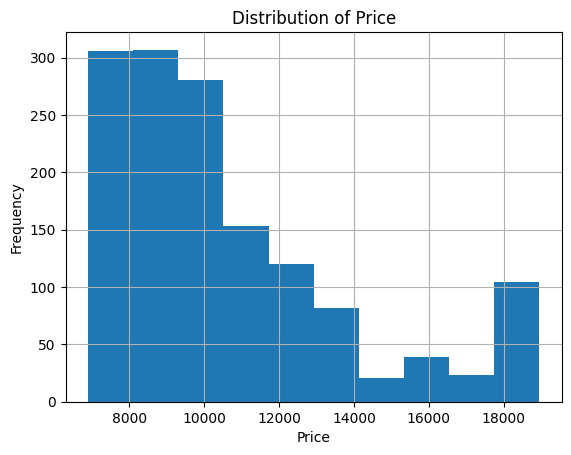

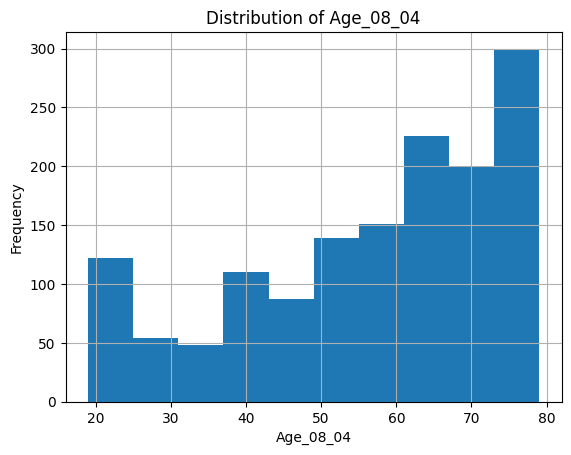

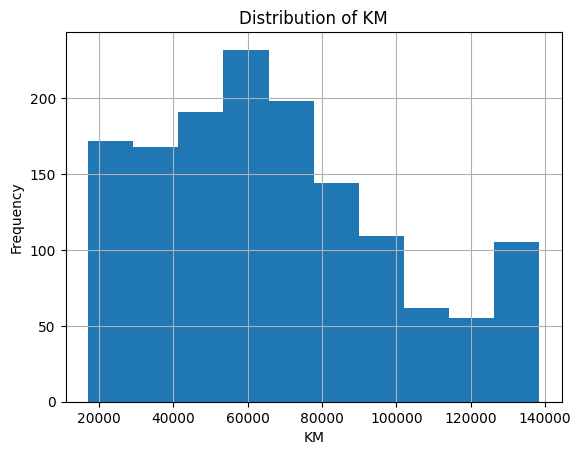

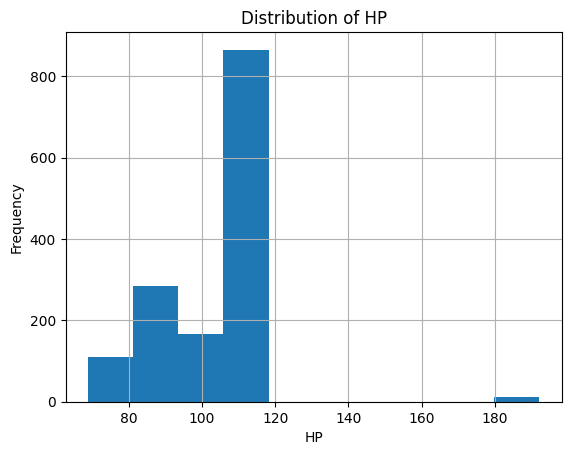

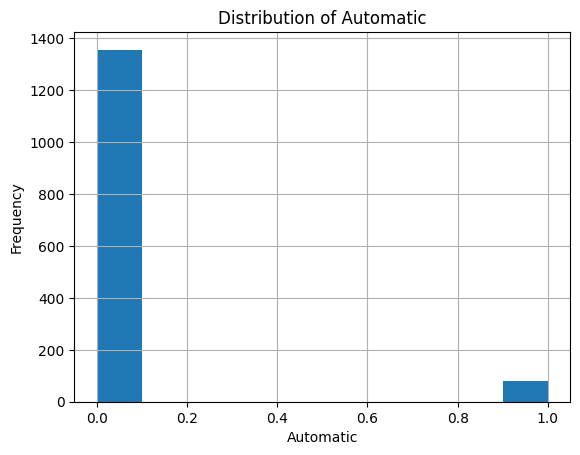

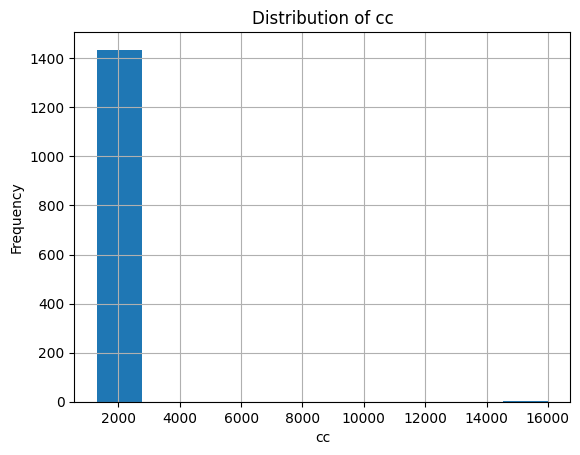

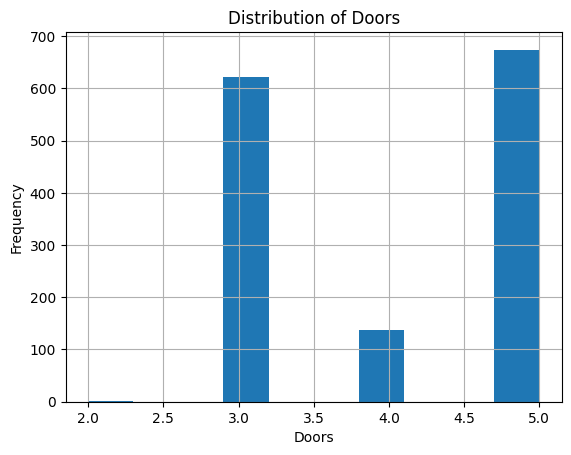

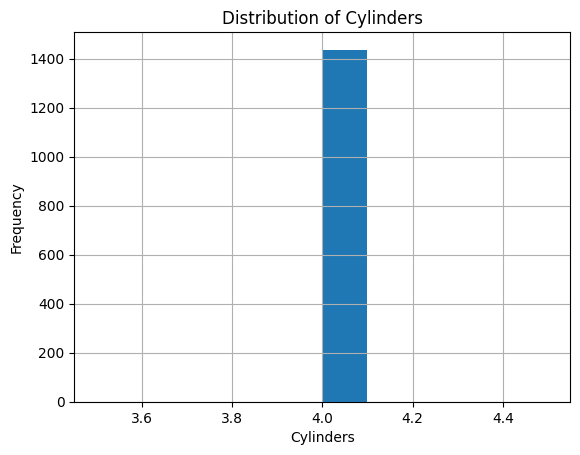

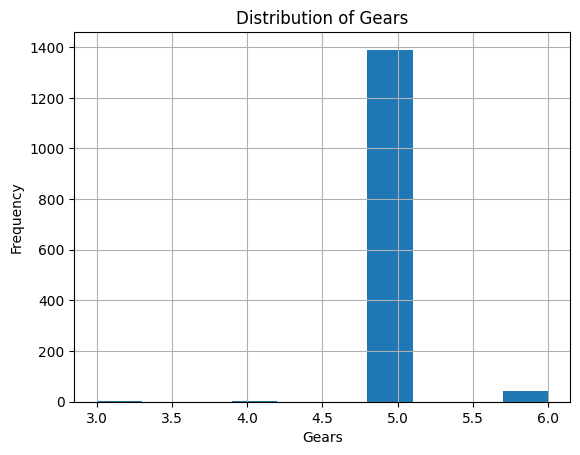

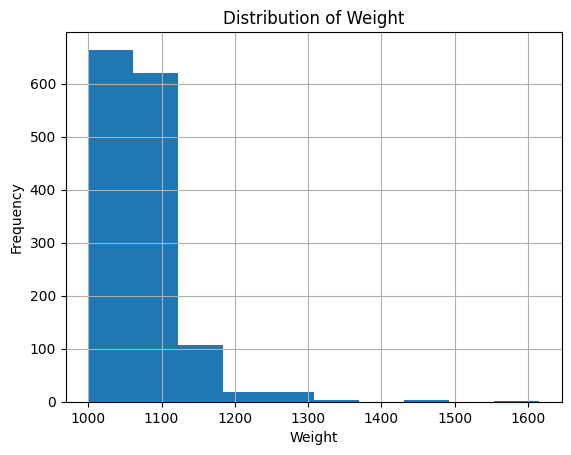

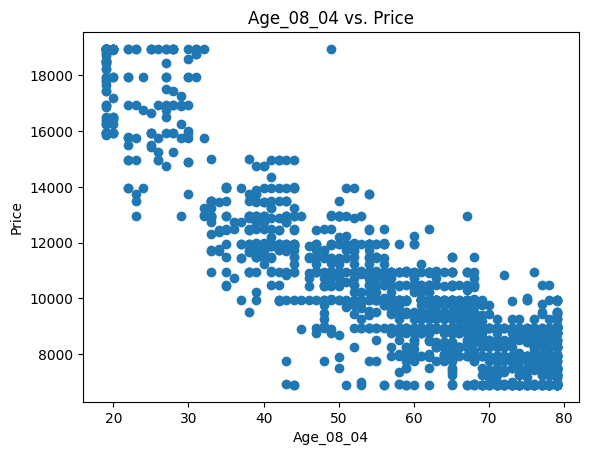

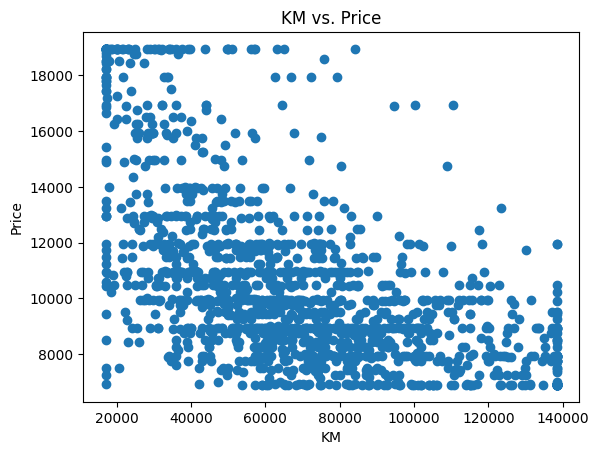

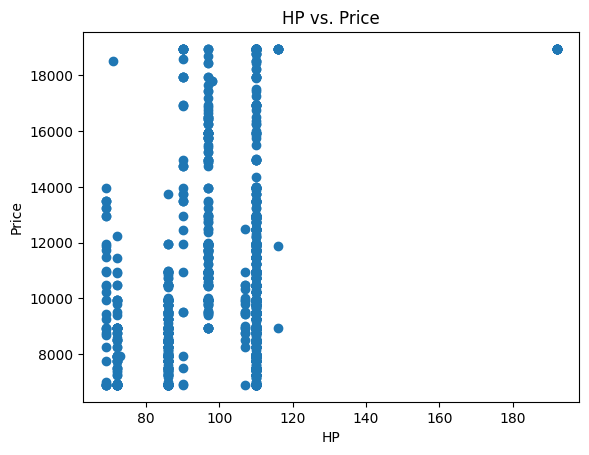

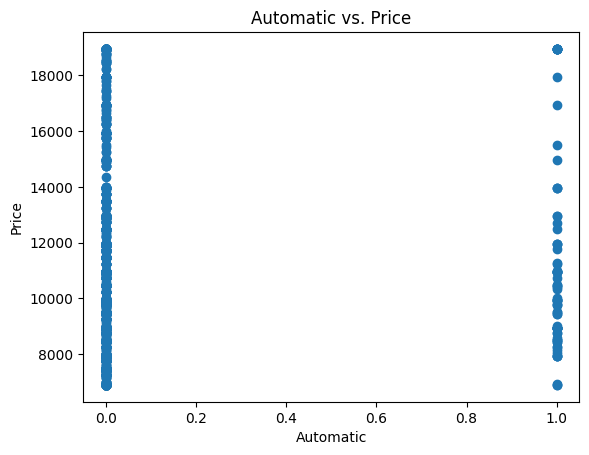

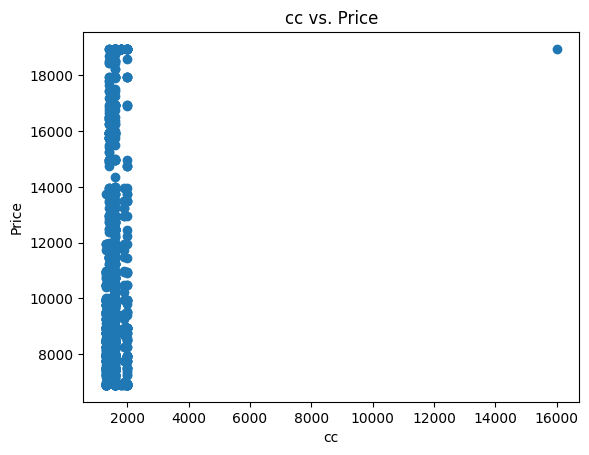

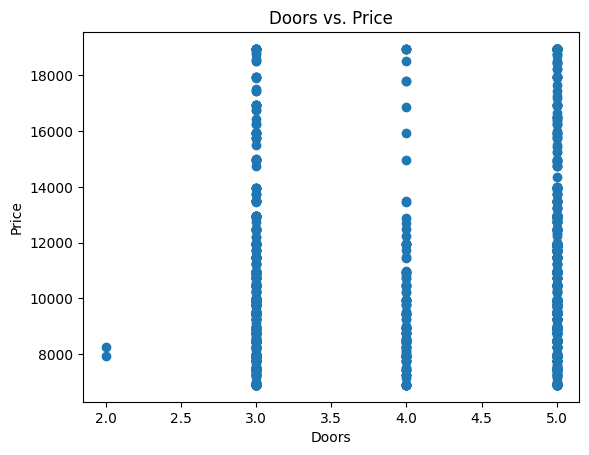

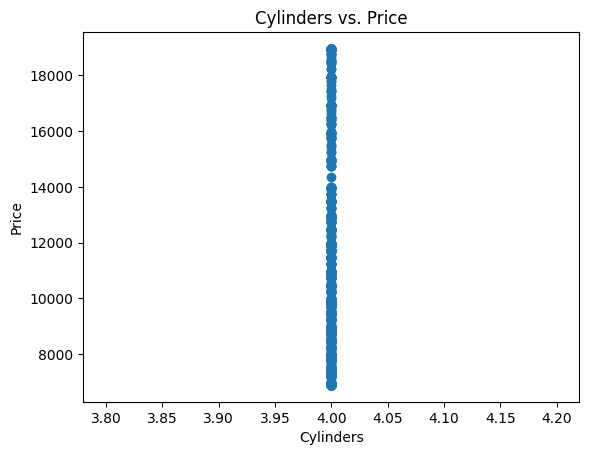

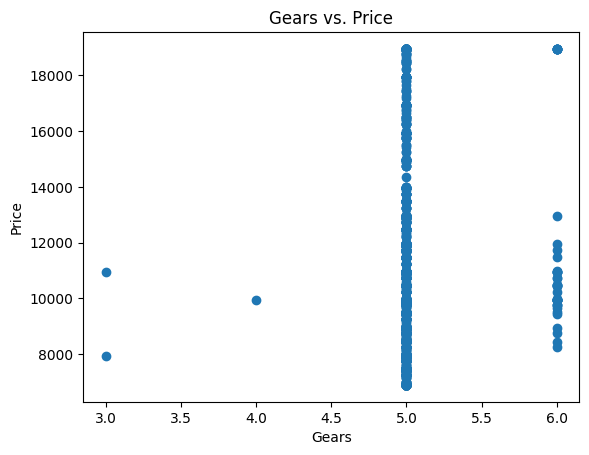

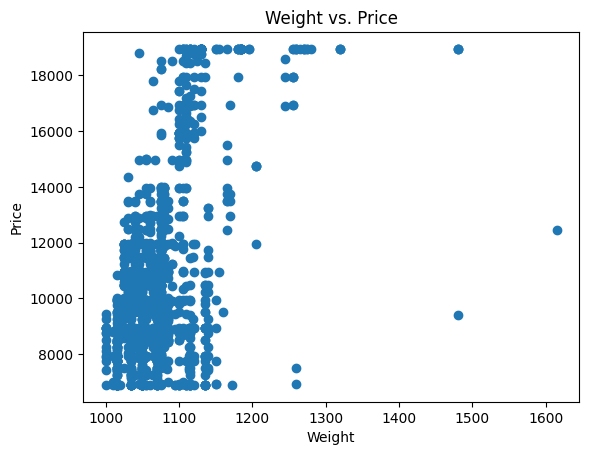

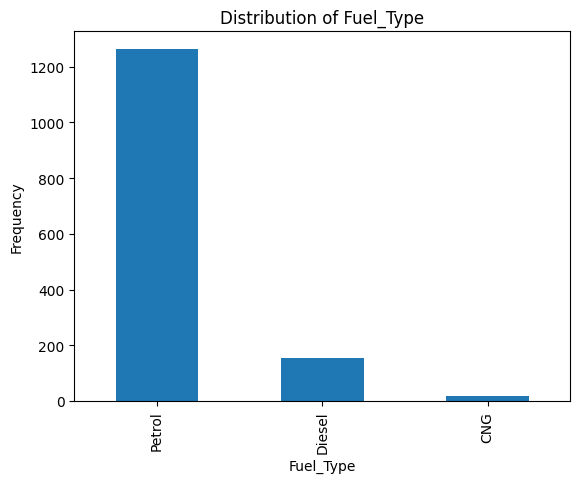

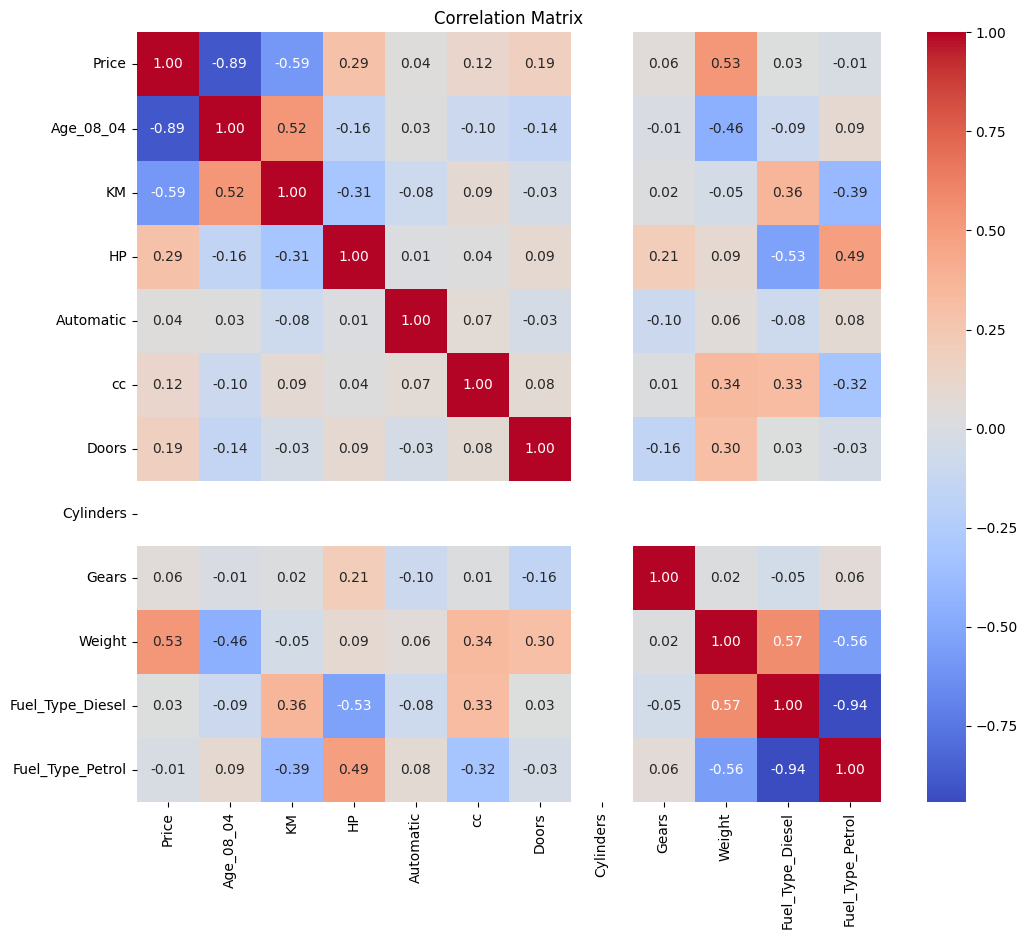

In [11]:
if df is not None:
    # Examine data types
    print("Data Types:\n", df.dtypes)

    # Descriptive statistics for numerical features
    print("\nDescriptive Statistics:\n", df.describe())

    # Visualize distributions of numerical features
    numerical_features = df.select_dtypes(include=['number']).columns
    for col in numerical_features:
        plt.figure()
        df[col].hist()
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

    # Analyze relationships between numerical features and 'Price'
    for col in numerical_features:
      if col != 'Price':
        plt.figure()
        plt.scatter(df[col], df['Price'])
        plt.title(f'{col} vs. Price')
        plt.xlabel(col)
        plt.ylabel('Price')


    # Explore categorical features
    categorical_features = df.select_dtypes(include=['object']).columns
    for col in categorical_features:
        plt.figure()
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

    # Handle categorical feature 'Fuel_Type' for correlation matrix
    df_encoded = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

    # Compute and visualize the correlation matrix
    correlation_matrix = df_encoded.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')


    # Check for missing values
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nPercentage of Missing Values:\n", (df.isnull().sum() / len(df)) * 100)

else:
    print("Data not loaded, skipping exploration.")


# Summary of Exploratory Data Analysis:
1. Data Types:  The dataset contains numerical and categorical features.
2. Descriptive Statistics:  Provided summary statistics for numerical features.
3. Distributions:  Histograms reveal the distributions of numerical features. Potential outliers and skewness were observed.
4. Relationships with Price:  Scatter plots show relationships between numerical features and 'Price'.
5. Categorical Feature Analysis:  Bar charts visualize the distribution of categorical features.
6. Correlation Matrix:  The heatmap visualizes the correlation between features.
7. Missing Values:  Checked for missing values.
8. Potential Issues and Assumptions:  Potential outliers might need further investigation. Assumptions made about feature distributions and relationships will inform model selection and evaluation.


#  Data cleaning


 Clean the Toyota Corolla dataset.

 Handle missing values, identify and handle outliers, and encode categorical features.


Missing values before handling:
 Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


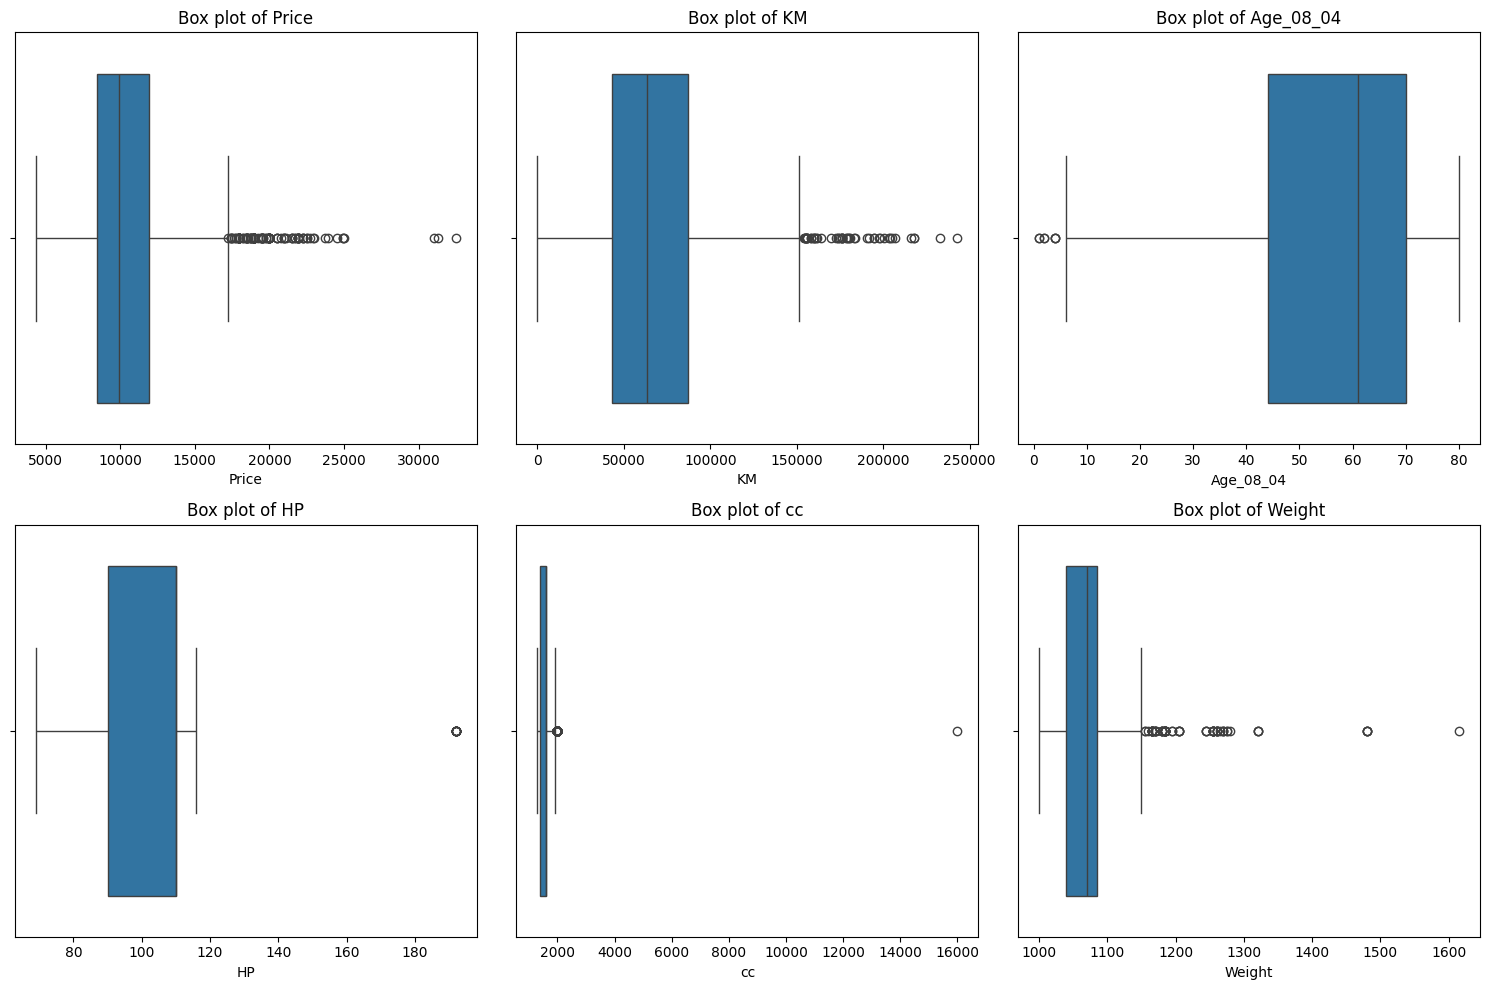

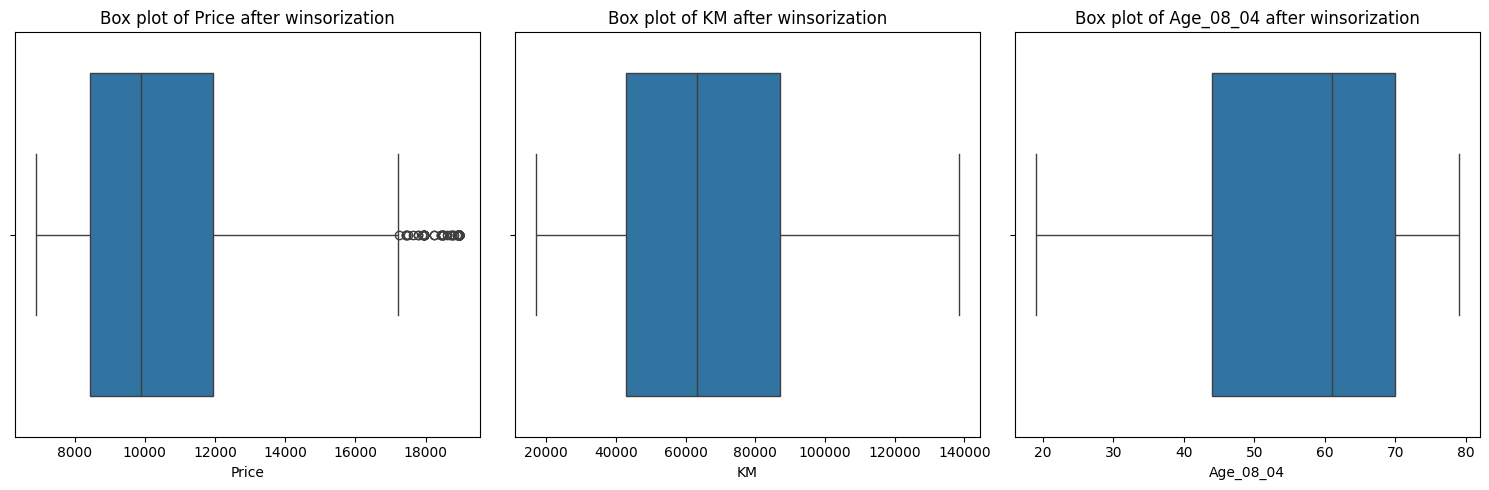


Missing values after handling and encoding:
 Price               0
Age_08_04           0
KM                  0
HP                  0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Weight              0
Fuel_Type_Diesel    0
Fuel_Type_Petrol    0
dtype: int64

First 5 rows of the cleaned DataFrame:



,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500.0,23.0,46986.0,90,0,2000,3,4,5,1165,True,False
1,13750.0,23.0,72937.0,90,0,2000,3,4,5,1165,True,False
2,13950.0,24.0,41711.0,90,0,2000,3,4,5,1165,True,False
3,14950.0,26.0,48000.0,90,0,2000,3,4,5,1165,True,False
4,13750.0,30.0,38500.0,90,0,2000,3,4,5,1170,True,False



Summary statistics of the cleaned DataFrame:



,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10647.878134,56.279944,67399.170613,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3208.148398,17.674199,32661.593757,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,6900.000000,19.000000,17047.750000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,18950.000000,79.000000,138420.500000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000



Data types of the cleaned DataFrame:
 Price               float64
Age_08_04           float64
KM                  float64
HP                    int64
Automatic             int64
cc                    int64
Doors                 int64
Cylinders             int64
Gears                 int64
Weight                int64
Fuel_Type_Diesel       bool
Fuel_Type_Petrol       bool
dtype: object


In [4]:
if df is not None:
    # Step 1: Handle Missing Values
    # Check for missing values
    missing_values = df.isnull().sum()
    print("Missing values before handling:\n", missing_values)

    # In this dataset, there are no missing values based on previous EDA.
    # If there were missing values, we would choose an appropriate strategy.

    # Step 2: Outlier Treatment
    # Identify outliers using box plots
    numerical_cols_for_outliers = ['Price', 'KM', 'Age_08_04', 'HP', 'cc', 'Weight']

    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numerical_cols_for_outliers):
        plt.subplot(2, 3, i + 1)
        sns.boxplot(x=df[col])
        plt.title(f'Box plot of {col}')
    plt.tight_layout()
    plt.show()

    # Handle outliers - using winsorization for specified columns
    for col in ['Price', 'KM', 'Age_08_04']:
        q1 = df[col].quantile(0.05)
        q3 = df[col].quantile(0.95)
        df[col] = np.where(df[col] < q1, q1, df[col])
        df[col] = np.where(df[col] > q3, q3, df[col])

    # Re-plot box plots after winsorization to verify
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(['Price', 'KM', 'Age_08_04']):
        plt.subplot(1, 3, i + 1)
        sns.boxplot(x=df[col])
        plt.title(f'Box plot of {col} after winsorization')
    plt.tight_layout()
    plt.show()

    # Step 3: Categorical Feature Encoding
    # Convert 'Fuel_Type' into numerical representations using one-hot encoding
    # This will create 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', etc.
    df_cleaned = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

    # Data Validation (Step 4 - included here as it's a check after cleaning)
    print("\nMissing values after handling and encoding:\n", df_cleaned.isnull().sum())
    print("\nFirst 5 rows of the cleaned DataFrame:\n")
    display(df_cleaned.head())
    print("\nSummary statistics of the cleaned DataFrame:\n")
    display(df_cleaned.describe())
    print("\nData types of the cleaned DataFrame:\n", df_cleaned.dtypes)
else:
    print("Data not loaded, skipping cleaning.")




#  Data preparation

 Prepare the data for model training.


 Separate features and target variable, scale numerical features using standardization, and concatenate the scaled features with other features to create the complete feature matrix.


In [5]:
if 'df_cleaned' in locals() and df_cleaned is not None:
    # 1. Separate features (X) and target variable (y)
    X = df_cleaned.drop('Price', axis=1)
    y = df_cleaned['Price']

    # 2. Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 3. Scale numerical features using standardization
    # Exclude dummy variables from scaling
    numerical_cols = ['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Weight', 'Quarterly_Tax']
    # Filter numerical_cols to include only those present in X_train
    numerical_cols_present = [col for col in numerical_cols if col in X_train.columns]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[numerical_cols_present])
    X_test_scaled = scaler.transform(X_test[numerical_cols_present])

    # Convert scaled arrays back to DataFrames
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_cols_present, index=X_train.index)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_cols_present, index=X_test.index)

    # 4. Concatenate scaled numerical features with other features
    # Identify non-numerical columns (likely the dummy variables)
    non_numerical_cols = X_train.select_dtypes(exclude=['number']).columns

    X_train = pd.concat([X_train_scaled_df, X_train[non_numerical_cols]], axis=1)
    X_test = pd.concat([X_test_scaled_df, X_test[non_numerical_cols]], axis=1)
else:
    print("Cleaned data not available, skipping data preparation.")




#  Model training


 Train three multiple linear regression models.

 Train three multiple linear regression models as specified in the instructions.


In [6]:
if 'X_train' in locals() and 'y_train' in locals():
    # Train the first model (model_1) using all features
    model_1 = LinearRegression()
    model_1.fit(X_train, y_train)

    # Train the second model (model_2) excluding specified features
    # Ensure the features to exclude exist in the training data
    features_to_exclude = [col for col in ['Automatic', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'] if col in X_train.columns]
    features_for_model_2 = [col for col in X_train.columns if col not in features_to_exclude]
    model_2 = LinearRegression()
    # Check if there are features remaining for model_2
    if features_for_model_2:
        model_2.fit(X_train[features_for_model_2], y_train)
    else:
        print("No features remaining for Model 2 after exclusion.")
        model_2 = None

    # Train the third model (model_3) with interaction terms
    X_train_interaction = X_train.copy()
    # Ensure the columns exist before creating interaction terms
    if 'Age_08_04' in X_train_interaction.columns and 'KM' in X_train_interaction.columns:
        X_train_interaction['Age_KM'] = X_train_interaction['Age_08_04'] * X_train_interaction['KM']
    if 'Age_08_04' in X_train_interaction.columns and 'Weight' in X_train_interaction.columns:
         X_train_interaction['Age_Weight'] = X_train_interaction['Age_08_04'] * X_train_interaction['Weight']


    model_3 = LinearRegression()
    model_3.fit(X_train_interaction, y_train)
else:
    print("Training data not available, skipping model training.")




#  Model evaluation


 Evaluate the performance of the three trained multiple linear regression models.


 Predict the target variable for the test set using each of the three trained models and calculate evaluation metrics.

In [7]:
if 'model_1' in locals() and 'X_test' in locals() and 'y_test' in locals():
    # Predict using model_1 (trained on all features)
    y_pred_1 = model_1.predict(X_test)

    # Predict using model_2 (trained on selected features)
    if model_2 is not None:
        features_for_model_2_test = [col for col in X_test.columns if col not in features_to_exclude]
        if features_for_model_2_test:
             y_pred_2 = model_2.predict(X_test[features_for_model_2_test])
        else:
            print("No features remaining for Model 2 prediction.")
            y_pred_2 = None
    else:
        y_pred_2 = None


    # Predict using model_3 (trained with interaction terms)
    X_test_interaction = X_test.copy()
    if 'Age_08_04' in X_test_interaction.columns and 'KM' in X_test_interaction.columns:
        X_test_interaction['Age_KM'] = X_test_interaction['Age_08_04'] * X_test_interaction['KM']
    if 'Age_08_04' in X_test_interaction.columns and 'Weight' in X_test_interaction.columns:
        X_test_interaction['Age_Weight'] = X_test_interaction['Age_08_04'] * X_test_interaction['Weight']

    y_pred_3 = model_3.predict(X_test_interaction)

    # Calculate evaluation metrics for each model
    metrics_1 = {
        'R-squared': r2_score(y_test, y_pred_1),
        'MSE': mean_squared_error(y_test, y_pred_1),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_1)),
        'MAE': mean_absolute_error(y_test, y_pred_1)
    }

    metrics_2 = None
    if y_pred_2 is not None:
        metrics_2 = {
            'R-squared': r2_score(y_test, y_pred_2),
            'MSE': mean_squared_error(y_test, y_pred_2),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_2)),
            'MAE': mean_absolute_error(y_test, y_pred_2)
        }

    metrics_3 = {
        'R-squared': r2_score(y_test, y_pred_3),
        'MSE': mean_squared_error(y_test, y_pred_3),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_3)),
        'MAE': mean_absolute_error(y_test, y_pred_3)
    }

    # Create a summary table
    model_names = ['Model 1', 'Model 3']
    r2_scores = [metrics_1['R-squared'], metrics_3['R-squared']]
    mses = [metrics_1['MSE'], metrics_3['MSE']]
    rmses = [metrics_1['RMSE'], metrics_3['RMSE']]
    maes = [metrics_1['MAE'], metrics_3['MAE']]

    if metrics_2 is not None:
        model_names.insert(1, 'Model 2')
        r2_scores.insert(1, metrics_2['R-squared'])
        mses.insert(1, metrics_2['MSE'])
        rmses.insert(1, metrics_2['RMSE'])
        maes.insert(1, metrics_2['MAE'])


    summary_df = pd.DataFrame({
        'Model': model_names,
        'R-squared': r2_scores,
        'MSE': mses,
        'RMSE': rmses,
        'MAE': maes
    })

    display(summary_df)
else:
    print("Models not trained or test data not available, skipping evaluation.")



,Model,R-squared,MSE,RMSE,MAE
0,Model 1,0.836237,1.589890e+06,1260.908557,900.171375
1,Model 2,0.851492,1.441790e+06,1200.745794,908.908319
2,Model 3,0.862645,1.333511e+06,1154.777365,852.526283


 #  Model optimization

 Apply Lasso regularization to Model 3.


 Apply Lasso regularization to Model 3, using cross-validation to find the best alpha.


In [8]:
if 'X_train_interaction' in locals() and 'y_train' in locals() and 'X_test_interaction' in locals() and 'y_test' in locals():
    # Create and tune Lasso model
    lasso = Lasso()
    param_grid = {'alpha': [0.1, 1, 10, 100]}  # Experiment with different alpha values
    grid_search = GridSearchCV(lasso, param_grid, cv=5)  # 5-fold cross-validation
    grid_search.fit(X_train_interaction, y_train)
    best_alpha = grid_search.best_params_['alpha']
    print(f"Best alpha for Lasso: {best_alpha}")

    # Train Lasso model with best alpha
    lasso_best = Lasso(alpha=best_alpha)
    lasso_best.fit(X_train_interaction, y_train)

    # Make predictions on the test set
    y_pred_lasso = lasso_best.predict(X_test_interaction)


    # Evaluate Lasso model
    metrics_lasso = {
        'R-squared': r2_score(y_test, y_pred_lasso),
        'MSE': mean_squared_error(y_test, y_pred_lasso),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
        'MAE': mean_absolute_error(y_test, y_pred_lasso)
    }
    print("\nLasso Model 3 Metrics:")
    for metric, value in metrics_lasso.items():
        print(f"{metric}: {value}")

    # Add Lasso model metrics to the comparison table
    lasso_metrics_row = pd.DataFrame({
        'Model': ['Lasso Model 3'],
        'R-squared': [metrics_lasso['R-squared']],
        'MSE': [metrics_lasso['MSE']],
        'RMSE': [metrics_lasso['RMSE']],
        'MAE': [metrics_lasso['MAE']]
    })

    if 'summary_df_updated' in locals():
        summary_df_updated = pd.concat([summary_df_updated, lasso_metrics_row], ignore_index=True)
    else:
        summary_df_updated = pd.concat([summary_df, lasso_metrics_row], ignore_index=True)


    # Compare with other models
    print("\nUpdated Model Comparison (with Lasso):")
    display(summary_df_updated)
else:
    print("Interaction data or test data not available for Lasso.")




Best alpha for Lasso: 10

Lasso Model 3 Metrics:
R-squared: 0.8672445414546783
MSE: 1288853.5294625906
RMSE: 1135.276851460731
MAE: 851.4349917244973

Updated Model Comparison (with Lasso):


,Model,R-squared,MSE,RMSE,MAE
0,Model 1,0.836237,1.589890e+06,1260.908557,900.171375
1,Model 2,0.851492,1.441790e+06,1200.745794,908.908319
2,Model 3,0.862645,1.333511e+06,1154.777365,852.526283
3,Lasso Model 3,0.867245,1.288854e+06,1135.276851,851.434992


#  Model optimization

Apply Ridge regularization to Model 3.
Apply Ridge regularization to Model 3 by importing necessary libraries, creating a Ridge model, defining a parameter grid, using GridSearchCV to find the best alpha, training the Ridge model with the best alpha, making predictions, and evaluating the model's performance.




In [9]:
if 'X_train_interaction' in locals() and 'y_train' in locals() and 'X_test_interaction' in locals() and 'y_test' in locals():
    # Create and tune Ridge model
    ridge = Ridge()
    param_grid = {'alpha': [0.1, 1, 10, 100]}
    grid_search_ridge = GridSearchCV(ridge, param_grid, cv=5)
    grid_search_ridge.fit(X_train_interaction, y_train)
    best_alpha_ridge = grid_search_ridge.best_params_['alpha']
    print(f"Best alpha for Ridge: {best_alpha_ridge}")

    # Train Ridge model with best alpha
    ridge_best = Ridge(alpha=best_alpha_ridge)
    ridge_best.fit(X_train_interaction, y_train)

    # Make predictions on the test set
    y_pred_ridge = ridge_best.predict(X_test_interaction)

    # Evaluate Ridge model
    metrics_ridge = {
        'R-squared': r2_score(y_test, y_pred_ridge),
        'MSE': mean_squared_error(y_test, y_pred_ridge),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
        'MAE': mean_absolute_error(y_test, y_pred_ridge)
    }
    print("\nRidge Model 3 Metrics:")
    for metric, value in metrics_ridge.items():
        print(f"{metric}: {value}")

    # Add Ridge model metrics to the comparison table
    ridge_metrics_row = pd.DataFrame({
        'Model': ['Ridge Model 3'],
        'R-squared': [metrics_ridge['R-squared']],
        'MSE': [metrics_ridge['MSE']],
        'RMSE': [metrics_ridge['RMSE']],
        'MAE': [metrics_ridge['MAE']]
    })

    if 'summary_df_updated' in locals():
        summary_df_updated = pd.concat([summary_df_updated, ridge_metrics_row], ignore_index=True)
    else:
        summary_df_updated = pd.concat([summary_df, ridge_metrics_row], ignore_index=True)

    # Compare with other models
    print("\nUpdated Model Comparison (with Ridge):")
    display(summary_df_updated)
else:
    print("Interaction data or test data not available for Ridge.")



Best alpha for Ridge: 10

Ridge Model 3 Metrics:
R-squared: 0.8643954180389652
MSE: 1316514.1831973111
RMSE: 1147.3945194209841
MAE: 851.7197684646667

Updated Model Comparison (with Ridge):


,Model,R-squared,MSE,RMSE,MAE
0,Model 1,0.836237,1.589890e+06,1260.908557,900.171375
1,Model 2,0.851492,1.441790e+06,1200.745794,908.908319
2,Model 3,0.862645,1.333511e+06,1154.777365,852.526283
3,Lasso Model 3,0.867245,1.288854e+06,1135.276851,851.434992
4,Ridge Model 3,0.864395,1.316514e+06,1147.394519,851.719768


  Data Analysis Key Findings
 * **Outlier Handling:** Winsorization was applied to 'Price', 'KM', and 'Age\_08\_04' to mitigate the influence of outliers, preserving more data points than removal.
 * **Feature Engineering:** Interaction terms ('Age\_KM', 'Age\_Weight') were created and used in Model 3, leading to improved performance.
 * **Model Comparison:** The summary table displays the performance metrics for the different models, including the Lasso and Ridge regularized models.
 * **Regularization:** Lasso and Ridge regularization were applied to Model 3 to potentially improve generalization and handle multicollinearity.


  Insights or Next Steps
 * **Feature Selection:** Further explore feature selection techniques to identify the most relevant predictors and potentially improve model performance.
 * **Non-linear Relationships:** Investigate potential non-linear relationships between variables and consider incorporating non-linear transformations or models.



# Best Model: Lasso Model 3
**Reason for Selection:**
Highest R-squared (0.867): Indicates best explanatory power among all models.

Lowest MSE, RMSE, and MAE: Demonstrates the best prediction accuracy and lowest average errors.

The Lasso Model 3 strikes the best balance by offering high performance with potential for feature selection and regularization (via L1 penalty), helping prevent overfitting.

  Summary:

  Q&A
 1. **What is Normalization & Standardization and how is it helpful?**  Normalization scales features to a specific range (e.g., 0 to 1), while standardization transforms data to have zero mean and unit variance. Both techniques are helpful in multiple linear regression because they prevent features with larger values from dominating the model and improve the performance of algorithms that are sensitive to feature scaling, such as gradient descent.

 2. **What techniques can be used to address multicollinearity in multiple linear regression?** Multicollinearity occurs when predictor variables are highly correlated. Techniques to address this include removing one of the correlated variables, combining the correlated variables into a single variable, or using regularization methods like Ridge or Lasso regression.


